# Preprocessing Pipeline 

In [80]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Loading Images

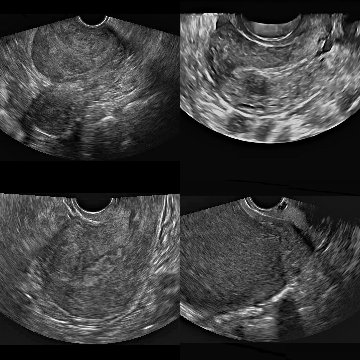

In [81]:
image = ["/content/gdrive/My Drive/Med Img Analysis/Images/Fibroids/orig images fibroid/1.jpg",
"/content/gdrive/My Drive/Med Img Analysis/Images/Fibroids/orig images fibroid/2.jpg",
"/content/gdrive/My Drive/Med Img Analysis/Images/Fibroids/orig images fibroid/3.jpg",
"/content/gdrive/My Drive/Med Img Analysis/Images/Fibroids/orig images fibroid/6.jpg"]
resized = []
i=0
img1 = cv.imread(image[0])
img2 = cv.imread(image[1])
img3 = cv.imread(image[2])
img4 = cv.imread(image[3])

rimg1 = cv.resize(img1,(180,180))
rimg2 = cv.resize(img2,(180,180))
rimg3 = cv.resize(img3,(180,180))
rimg4 = cv.resize(img4,(180,180))

image_row_1 = cv.hconcat([rimg1, rimg2])
image_row_2 = cv.hconcat([rimg3, rimg4])

combined_image = cv.vconcat([image_row_1, image_row_2])

cv2_imshow(combined_image)

Preprocessing is implemented on the Ultrasound images of Uterine Fibroids 

### Negative Transformation

In [82]:
print(rimg1.dtype)

uint8


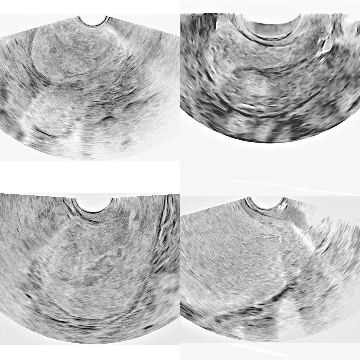

In [83]:
img_neg1 = 255 - rimg1
img_neg2 = 255 - rimg2
img_neg3 = 255 - rimg3
img_neg4 = 255 - rimg4

image_row_1 = cv.hconcat([img_neg1, img_neg2])
image_row_2 = cv.hconcat([img_neg3, img_neg4])

combined_image = cv.vconcat([image_row_1, image_row_2])

cv2_imshow(combined_image)

### Plotting Histogram

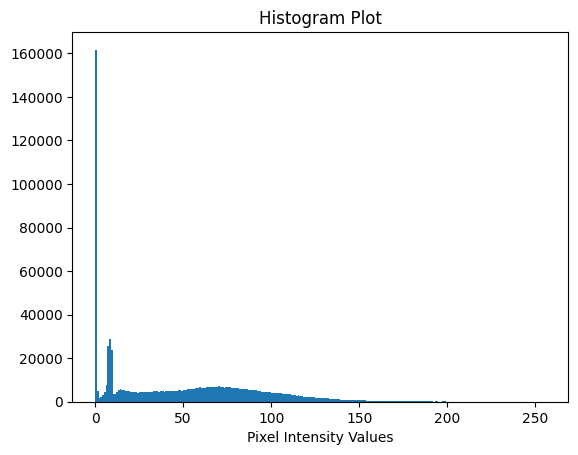

In [84]:
plt.hist(img1.ravel(),256,[0,256])
plt.title('Histogram Plot')
plt.xlabel('Pixel Intensity Values')
#plt.ylim(0,2000)
plt.show()

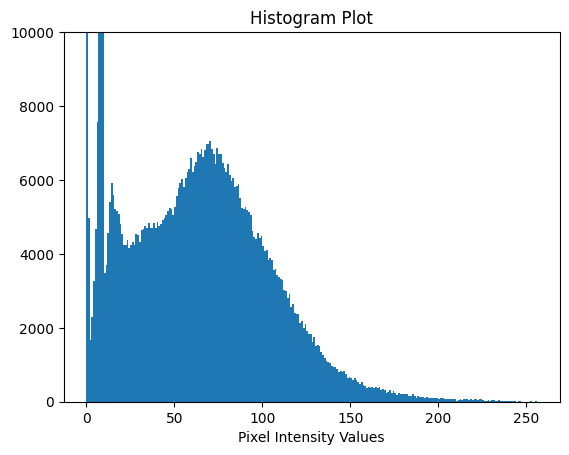

In [85]:
plt.hist(img1.ravel(),256,[0,256])
plt.title('Histogram Plot')
plt.xlabel('Pixel Intensity Values')
plt.ylim(0,10000)
plt.show()

Histogram plot : observed - bell curve <br>
In general, a histogram with a bell curve indicates that the image has a good balance of brightness values, and that the majority of the pixels in the image have values that are neither too bright nor too dark. 

## Point Preprocessing Methodologies

### Blur Filters :
1. Linear Filters - Mean, Gaussian(Second Order filter), Bilateral
2. Non Linear Filters - Median, Max, Min
3. Dierectional Filters -<br> 
    3.1 First Order - Roberts, Prewitts, Krish, Sobel<br> 
    3.2 Second Order - Laplacian<br> 


Directional filters are designed to enhance edges or lines and not typically to reduce noise. Hence application of Directional filters in this study is not presented. 

Kernel Size = (3,3) - standard kernel size 

####For Comparison in Filter Performance :PSNR Value



In [86]:
LFilters=np.zeros(3)
NFilters=np.zeros(3)
Filters=np.zeros(6)
from math import log10, sqrt
def PSNR(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

### Linear Filters


#### Mean Filter

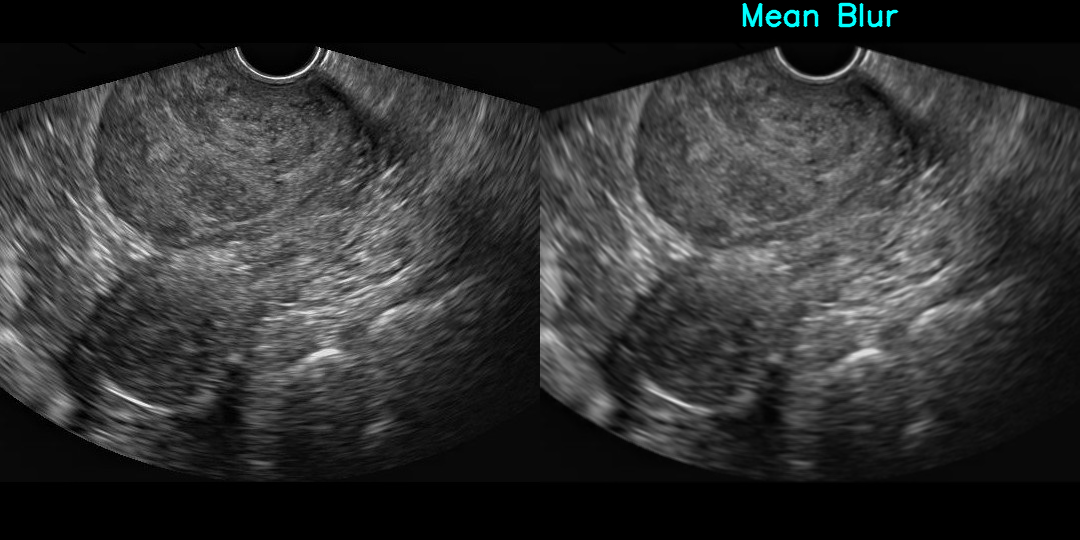

In [157]:
meanBlur_img1 = cv.blur(img1,(3,3))#kernel size taken as 3,3 as standard kernel size

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2
w_MBlur_image = cv.putText(meanBlur_img1, 'Mean Blur', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame = cv.hconcat((img1, meanBlur_img1))

cv2_imshow(final_frame)

LFilters[0] = PSNR(img1,meanBlur_img1)

### Guassian Filter

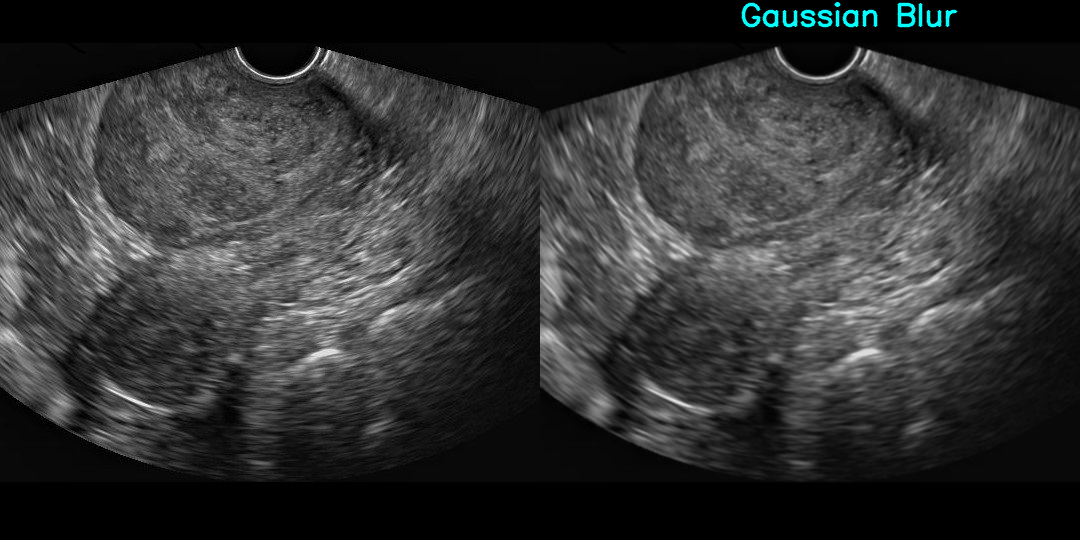

In [158]:
gaussianBlur_img1 = cv.GaussianBlur(img1,(3,3),0)#0 is standard deviation in x and y dierection
font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2
w_GBlur_image = cv.putText(gaussianBlur_img1, 'Gaussian Blur', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame2 = cv.hconcat((img1, gaussianBlur_img1))

cv2_imshow(final_frame2)

LFilters[1] = PSNR(img1,gaussianBlur_img1)

### Bilateral Filter

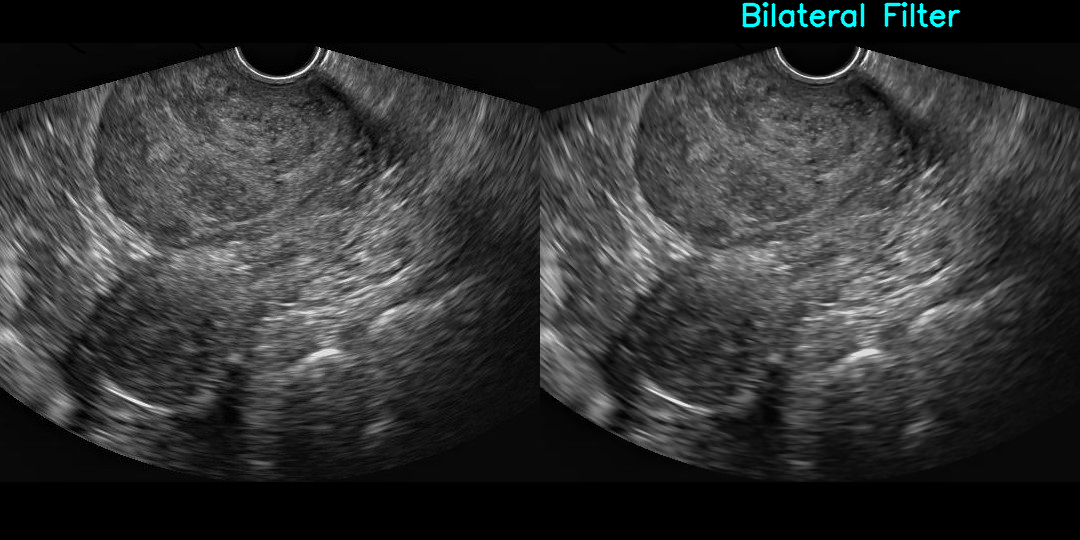

In [159]:
bilateralBlur_img1 = cv.bilateralFilter(img1,3,40,40)#3-kernel size,20 is sigmaSpace depicting number of pixel 
                                                     #in neighbourhood to merge with similar intensities

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2
bilateralBlur_image = cv.putText(bilateralBlur_img1, 'Bilateral Filter', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame3 = cv.hconcat((img1, bilateralBlur_img1))

cv2_imshow(final_frame3)

LFilters[2] = PSNR(img1,bilateralBlur_img1)

## Non Linear Filters

#### Median Filter

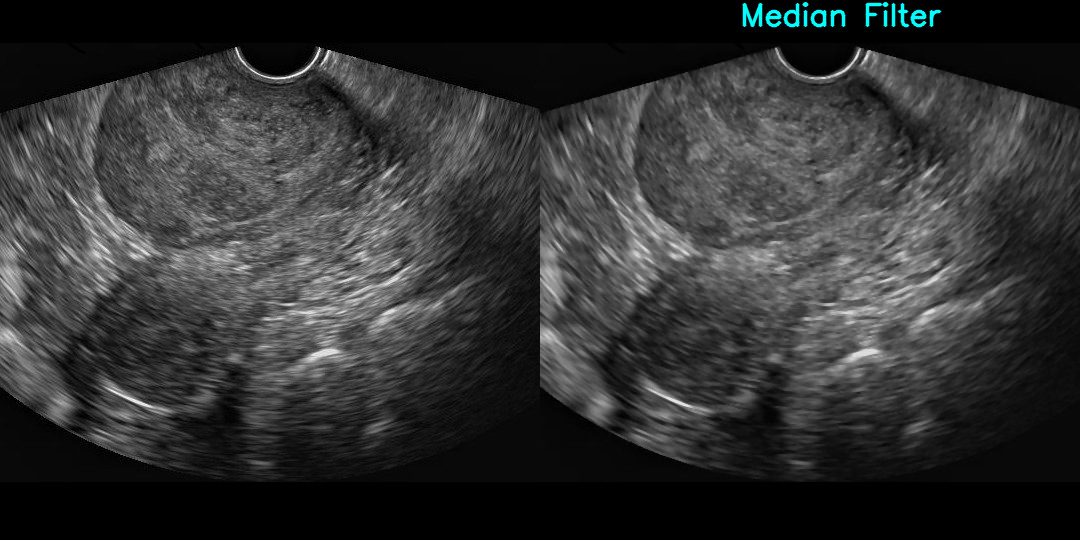

In [160]:
medianFilter_img1 = cv.medianBlur(img1,3)#3-kernel size
font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2
w_GBlur_image = cv.putText(medianFilter_img1, 'Median Filter', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame3 = cv.hconcat((img1, medianFilter_img1))

cv2_imshow(final_frame3)
NFilters[0] = PSNR(img1,medianFilter_img1)

#### Min Filter

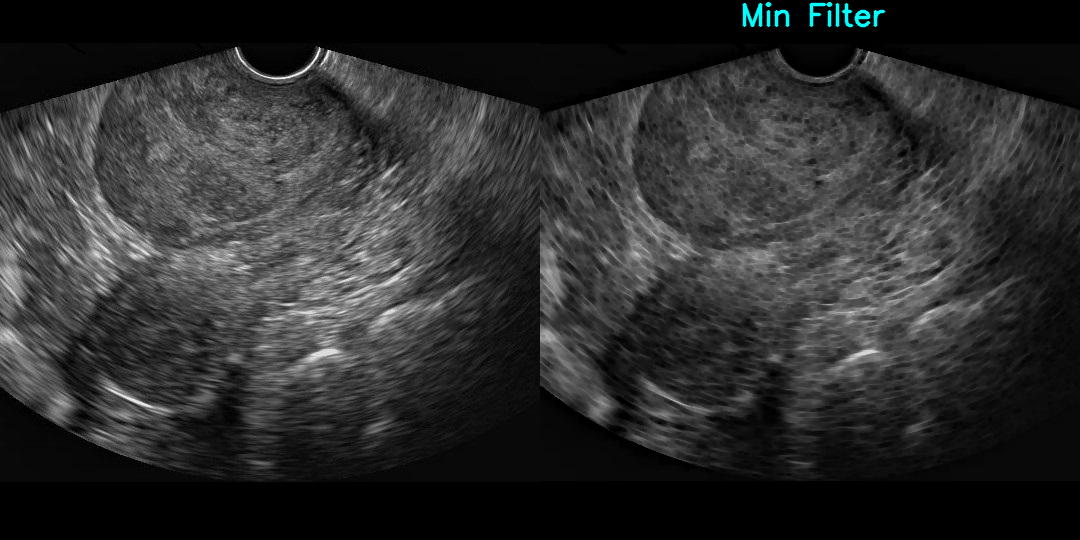

In [161]:
size = (3, 3)
shape = cv.MORPH_RECT
kernel = cv.getStructuringElement(shape, size)

min_filtered_img1 = img1

minFilImg = cv.erode(min_filtered_img1, kernel)

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2

minFiltered_image = cv.putText(minFilImg, 'Min Filter', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame4 = cv.hconcat((img1, minFiltered_image))

cv2_imshow(final_frame4)
NFilters[1] = PSNR(img1,minFilImg)

### Max Filter

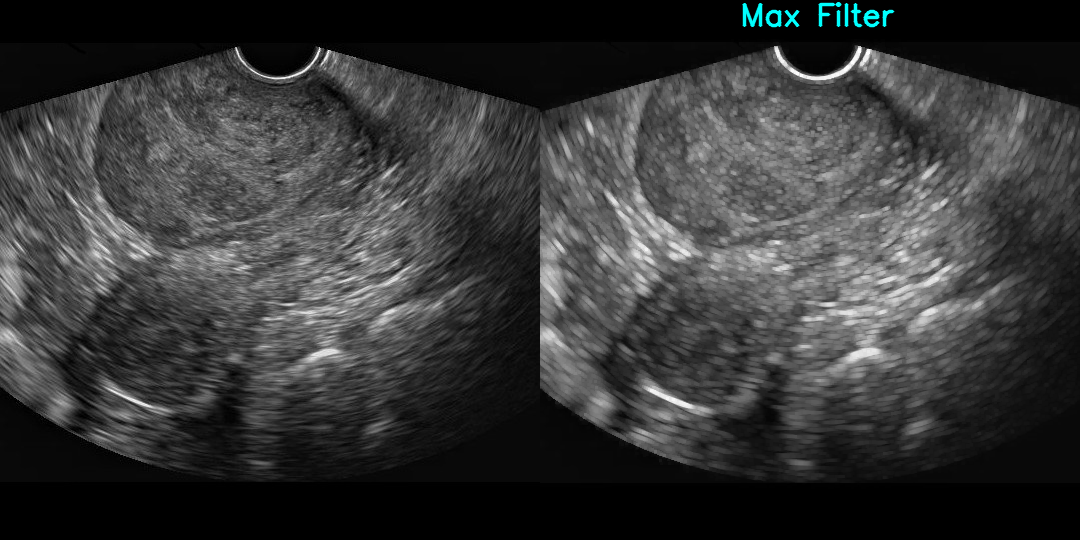

In [162]:
size = (3, 3)
shape = cv.MORPH_RECT
kernel = cv.getStructuringElement(shape, size)

max_filtered_img1 = img1

maxFilImg = cv.dilate(max_filtered_img1, kernel)

font = cv.FONT_HERSHEY_SIMPLEX
org = (200, 25)
fontScale = 1
color = (255, 255, )
thickness = 2

maxFiltered_image = cv.putText(maxFilImg, 'Max Filter', org, font,fontScale, color, thickness, cv.LINE_AA)
   
final_frame5 = cv.hconcat((img1, maxFiltered_image))

cv2_imshow(final_frame5)
NFilters[2] = PSNR(img1,maxFilImg)


## Performance Comparison of all the Blur Filters

###Comparison of Linear Filter PSNR Value with respect to Image 1

In [163]:
LinearFilters = ['Mean', 'Gaussian', 'Bilateral']
x_pos1 = np.arange(len(LinearFilters))

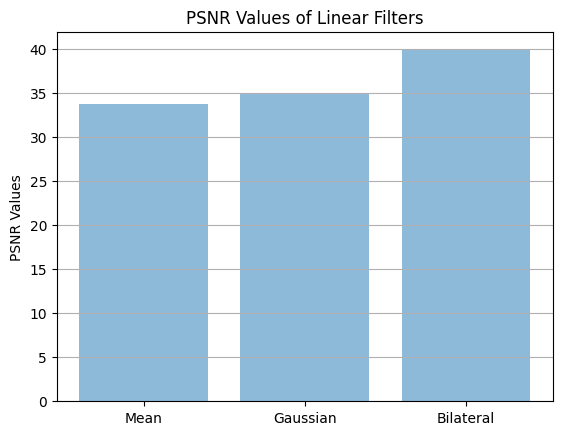

In [164]:

fig, ax = plt.subplots()
ax.bar(x_pos1, LFilters, align='center', alpha=0.5)
ax.set_ylabel('PSNR Values')
ax.set_xticks(x_pos1)
ax.set_xticklabels(LinearFilters)
ax.set_title('PSNR Values of Linear Filters')
ax.yaxis.grid(True)

###Comparison of Non-Linear Filter PSNR Value with respect to Image 1

In [165]:
NonLinearFilters = ['Median', 'Min', 'Max']
x_pos2 = np.arange(len(NonLinearFilters))

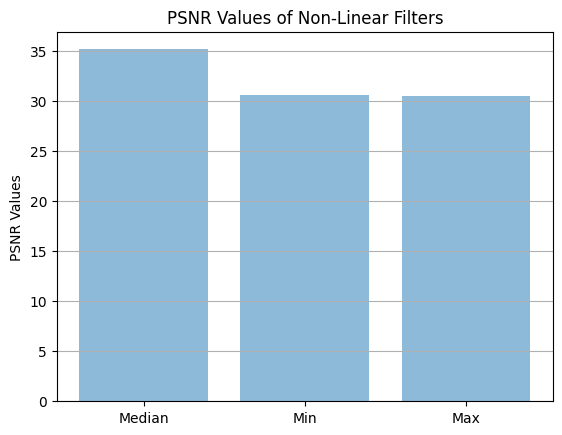

In [166]:
fig, ax = plt.subplots()
ax.bar(x_pos2, NFilters, align='center', alpha=0.5)
ax.set_ylabel('PSNR Values')
ax.set_xticks(x_pos2)
ax.set_xticklabels(NonLinearFilters)
ax.set_title('PSNR Values of Non-Linear Filters')
ax.yaxis.grid(True)

###Comparison of all the Linear and Non-Linear Filter PSNR Value with respect to Image 1

In [167]:
Filter=['Mean', 'Gaussian','Bilateral','Median', 'Min', 'Max']
X_pos = np.arange(len(Filter))

In [168]:
n=0
for i in range(0,3):
  Filters[n]=LFilters[i]
  n=n+1
for i in range(0,3):
  Filters[n]=NFilters[i]
  n=n+1

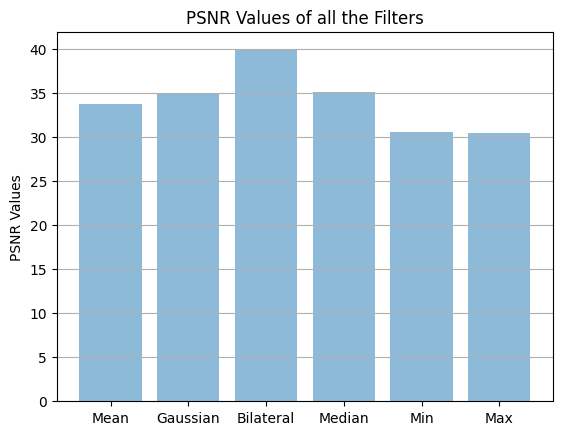

In [169]:
fig, ax = plt.subplots()
ax.bar(X_pos, Filters, align='center', alpha=0.5)
ax.set_ylabel('PSNR Values')
ax.set_xticks(X_pos)
ax.set_xticklabels(Filter)
ax.set_title('PSNR Values of all the Filters')
ax.yaxis.grid(True)

Out of all the Blur filters applied on images the filters provided with better PSNR value are:<br>
1)Bilateral Filter<br>
2)Guassian Filter<br>
3)Median FIlter<br>



The filter chose from these is Guassian filter due to the the reasons as-<br><br>
a)Bilateral filter is effective in preserving edges and important details while smoothing the image. <br>
b)The Gaussian blur filter is effective in reducing noise and smoothing out the image.<br>
c)The median filter is effective in removing salt-and-pepper noise, which appears as isolated white and black pixels in an image.<br><br>
Since our concern is not preserving the details and edges and neither in removal of salt and pepper noise and smoothing the image is more important that we choose guassian blur filter

## Brightness Contrast

In [170]:
def brightness_contrast(img, brightness=255, contrast=127):
    brightness = int((brightness - 0) * (255 - (-255)) / (510 - 0) + (-255))
    contrast = int((contrast - 0) * (127 - (-127)) / (254 - 0) + (-127))
  
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            max = 255
        else:
            shadow = 0
            max = 255 + brightness
        al_pha = (max - shadow) / 255
        ga_mma = shadow
        # The function addWeighted calculates
        # the weighted sum of two arrays
        cal = cv.addWeighted(img, al_pha, img, 0, ga_mma)
    else:
        cal = img
  
    if contrast != 0:
        Alpha = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        Gamma = 127 * (1 - Alpha)
        # The function addWeighted calculates
        # the weighted sum of two arrays
        cal = cv.addWeighted(cal, Alpha, cal, 0, Gamma)
    # putText renders the specified text string in the image.
    return cal

*   While Brightness increases the overall lightness of the image.
*   Contrast enhancements improve the perceptibility of objects in the scene by enhancing the brightness difference between objects and their backgrounds. 

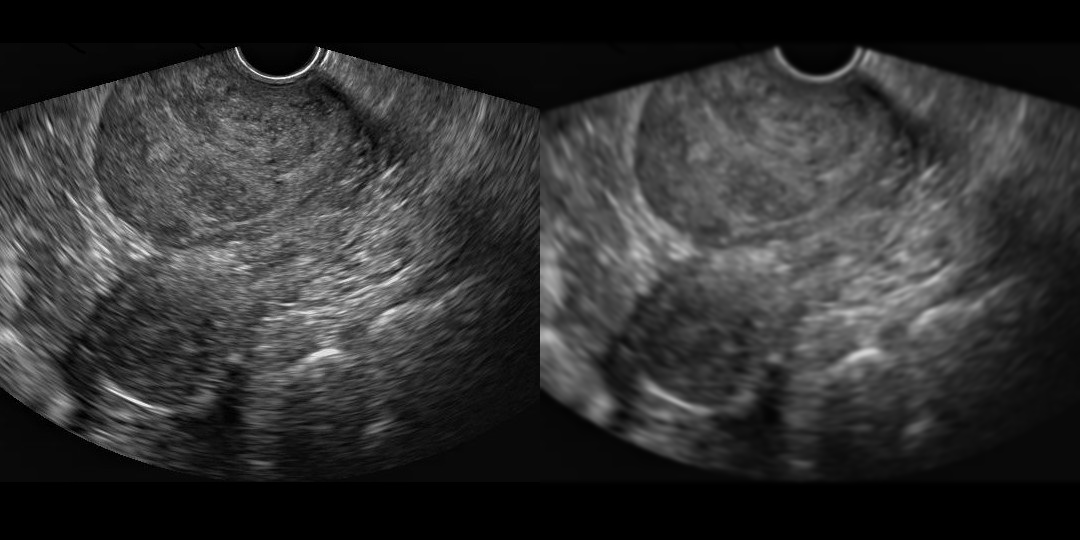

In [171]:
BLUR_SIZE = 11
fibroid  = cv.imread("/content/gdrive/My Drive/Med Img Analysis/Images/Fibroids/orig images fibroid/1.jpg")
blurred = cv.GaussianBlur(fibroid, (BLUR_SIZE, BLUR_SIZE), 0)
both = cv.hconcat((fibroid, blurred))
cv2_imshow(both)

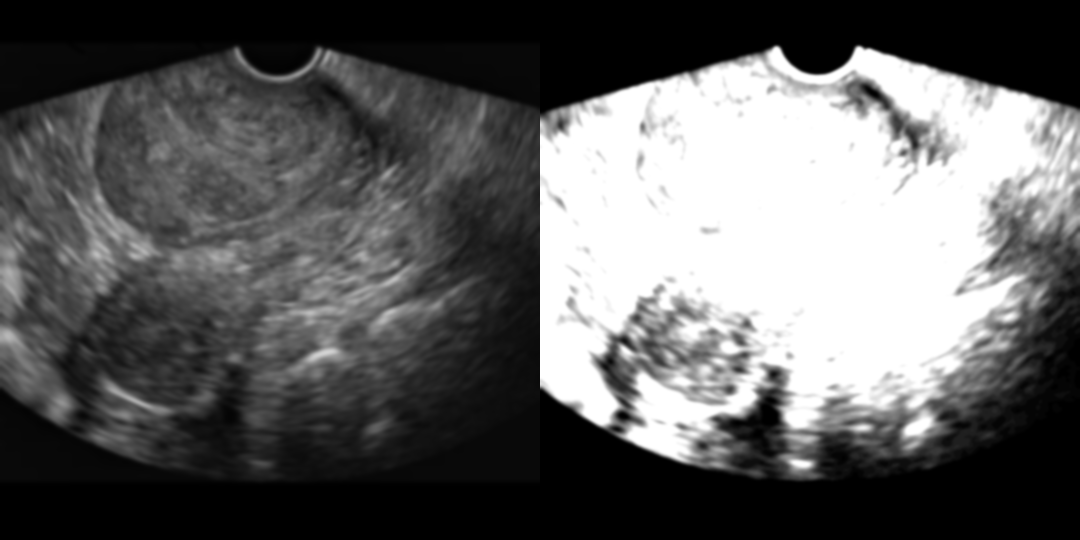

In [172]:
out = brightness_contrast(blurred, brightness=360, contrast=220)
out = brightness_contrast(out, brightness=250, contrast=150)
out = cv.GaussianBlur(out, (5, 5), 0)
both = cv.hconcat((blurred, out))
cv2_imshow(both)

In [173]:
def preprocess_fibroid(img, blur_size=11):
    img = cv.GaussianBlur(img, (blur_size, blur_size), 0)
    img = brightness_contrast(img, brightness=360, contrast=220)
    img = brightness_contrast(img, brightness=250, contrast=150)
    img = cv.GaussianBlur(img, (5, 5), 0)
    return img

#### The final pipeline is defined in preprocess_fibroid <br>
Application of Guassian Blur on the image as filter<br>
Applying Brightness contrast with varying brightness and contrast according to requirement

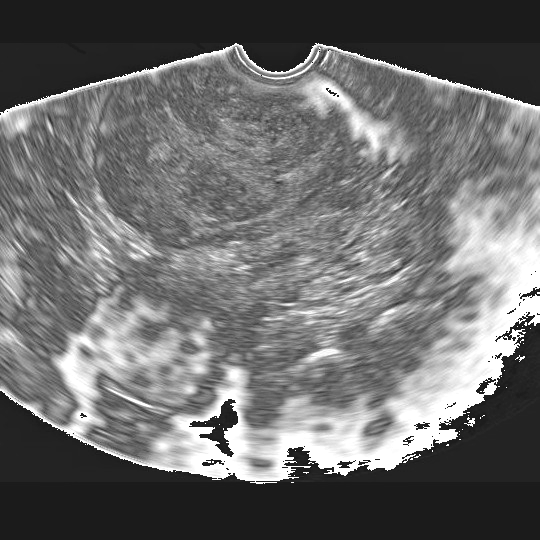

In [174]:
subbed = fibroid - out
cont = brightness_contrast(subbed, brightness=300, contrast=140)
cv2_imshow(cont)

As visible in the above image the preprocessing helps in differenciating the edges and in better visibility of any irregularities present.

In [176]:
dir = "/content/gdrive/My Drive/Med Img Analysis/Images/Fibroids/orig images fibroid"
import os
for filename in os.listdir(dir):
    img = cv.imread(os.path.join(dir, filename))
    after = preprocess_fibroid(img)
    both = cv.hconcat((img, after))
    cv2_imshow(both)

Output hidden; open in https://colab.research.google.com to view.